In [266]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.17


In [267]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [268]:
#!pip install seaborn==0.11.1
#!pip install category_encoders==2.2.2
#!pip install missingno==0.5.0
#!pip install pandas==1.3.3
#!pip install plotly==5.3.1
#!pip install scipy==1.6.2
#!pip install matplotlib==3.4.3
#!pip install numpy==1.21.2

## Carregando os Dados

In [269]:
#Carrega dataset 
df = pd.read_csv('dataset/aug_train.csv')

In [270]:
#Shape
df.shape

(19158, 14)

In [271]:
#Colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [272]:
#Amostra dos dados 
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [273]:
#Info 
#Obs.: a coluna target é do tipo categórica, mas o python entendeu como float. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise Exploratória de Dados 

In [274]:
# descrevendo os dados não numéricos 
# Obs.: estatistícas de uma variável categórica 
df.describe(include=object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [275]:
# Descrevendo os dados numéricos 
# Obs.: estou dropando as variáveis que eu sei que não são numéricas (mas o interpretador do python definiu como numérica)
df.describe().drop(columns=['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* Em **city_development_index** (CDI), os valores médios são 0,828, mediana 0,903 e std 0,123. Isso significa que a maioria dos candidatos é de cidades bem desenvolvidas.


* Em **training_hours**, os valores médios são 65,367, mediana 47 e max 336. Isso significa que há mais candidatos com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento.

### Visualizando as Variáveis Categóricas

In [276]:
#Obs.: fazendo uma lista das colunas do tipo object
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

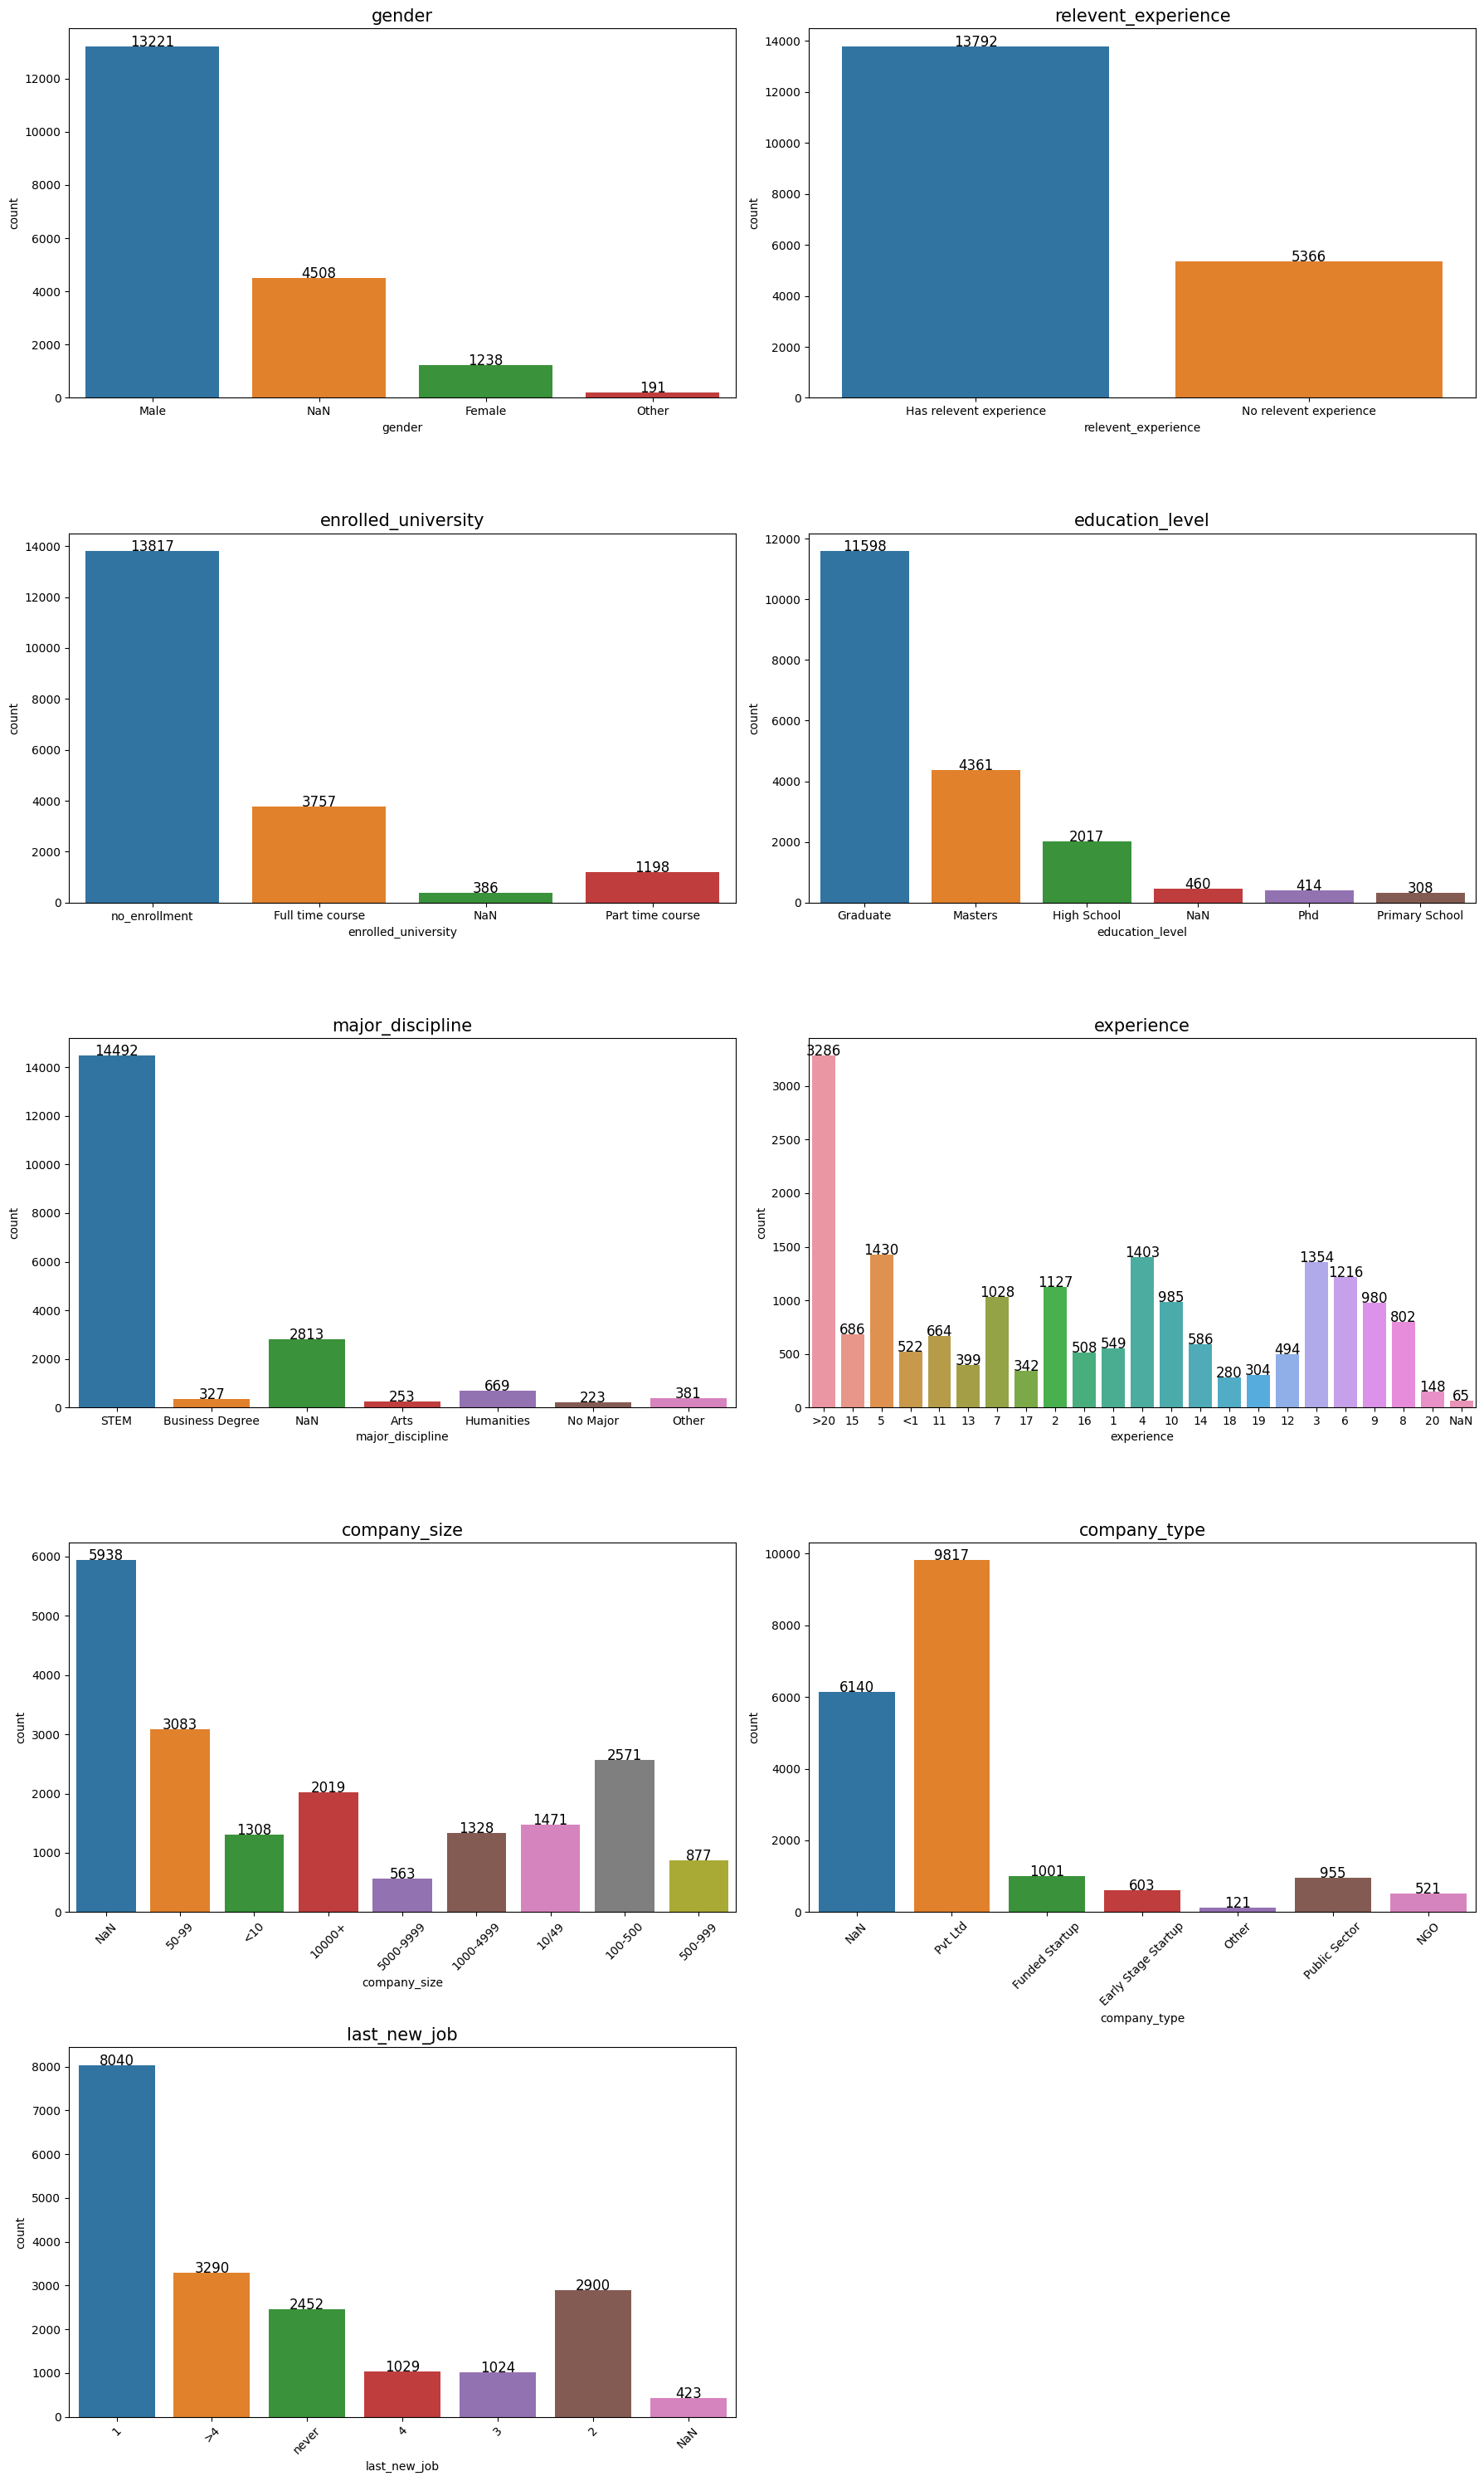

In [277]:
# Plot

# Tamanho da figura
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

In [278]:
import plotly.graph_objects as go 

In [279]:
# Separando a contagem da variável para plotar no gráfico 
# Não esquecer de preencher com NaN para aparecer no gráfico
data = df.fillna('NaN')

count_df = data['gender'].value_counts()
type(count_df)

# Verificando a soma 
#sum(count_df)

pandas.core.series.Series

In [280]:
# Transformando o pandas series em dataframe 
dataframe = count_df.to_frame()
dataframe

,gender
Male,13221
NaN,4508
Female,1238
Other,191


In [281]:
# Fazendo com a plotly

fig = go.Figure()

fig.add_trace(go.Bar(x=dataframe.index, y=dataframe['gender']))
fig.show()

In [282]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [283]:
# Fazendo de uma forma programática para outras colunas 

data = df.fillna('NaN')

# Lista de colunas
column_list = list(df.columns.values)[3:12]

counts_dict ={}
for c in column_list:
    counts = data[c].value_counts()
    counts_dict[c] = counts

counts_dict


{'gender': Male      13221
 NaN        4508
 Female     1238
 Other       191
 Name: gender, dtype: int64,
 'relevent_experience': Has relevent experience    13792
 No relevent experience      5366
 Name: relevent_experience, dtype: int64,
 'enrolled_university': no_enrollment       13817
 Full time course     3757
 Part time course     1198
 NaN                   386
 Name: enrolled_university, dtype: int64,
 'education_level': Graduate          11598
 Masters            4361
 High School        2017
 NaN                 460
 Phd                 414
 Primary School      308
 Name: education_level, dtype: int64,
 'major_discipline': STEM               14492
 NaN                 2813
 Humanities           669
 Other                381
 Business Degree      327
 Arts                 253
 No Major             223
 Name: major_discipline, dtype: int64,
 'experience': >20    3286
 5      1430
 4      1403
 3      1354
 6      1216
 2      1127
 7      1028
 10      985
 9       980
 8      

In [284]:
counts_dict.items()

dict_items([('gender', Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64), ('relevent_experience', Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64), ('enrolled_university', no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64), ('education_level', Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64), ('major_discipline', STEM               14492
NaN                 2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64), ('experience', >20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      68

In [285]:
from plotly.subplots import make_subplots

In [286]:
df.value_counts(['relevent_experience', 'gender'])

relevent_experience      gender
Has relevent experience  Male      9955
No relevent experience   Male      3266
Has relevent experience  Female     871
No relevent experience   Female     367
Has relevent experience  Other      107
No relevent experience   Other       84
dtype: int64

In [287]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=counts_dict['gender'].index,
        y=counts_dict['gender'].values,
        text=counts_dict['gender'].values,
        textposition='outside',
        marker_color=['blue', 'green', 'blue', 'blue']
    )
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [288]:
df_iter = counts_dict['gender'].to_frame('counts')
df_iter

,counts
Male,13221
NaN,4508
Female,1238
Other,191


In [289]:
df_list = []
for variable_name, counts, in counts_dict.items():
    if isinstance(counts, pd.Series):
        df_iter = counts.to_frame(name='counts')
    elif isinstance(counts, pd.DataFrame):
        df_iter = counts.rename(columns={counts.columns[0]: 'counts'})
    else:
        # Trate casos em que o objeto counts não é nem uma Series nem um DataFrame, se necessário.
        continue
    df_iter.index.name = 'value'
    df_iter = df_iter.reset_index()
    df_iter['variable_name'] = variable_name
    df_list += [df_iter]
counts_df = pd.concat(df_list)

In [290]:
counts_df.variable_name.unique()

array(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience',
       'company_size', 'company_type', 'last_new_job'], dtype=object)

In [291]:
counts_df.query('variable_name == "major_discipline"').drop(columns='variable_name')

,value,counts
0,STEM,14492
1,NaN,2813
2,Humanities,669
3,Other,381
4,Business Degree,327
5,Arts,253
6,No Major,223


In [292]:
fig = px.bar(counts_df, x='value', y='counts', facet_row='variable_name', height=3000)
fig.update_xaxes(matches=None)
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))
fig.show()

### Verificando a Distribuição das Variáveis Numéricas

In [293]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


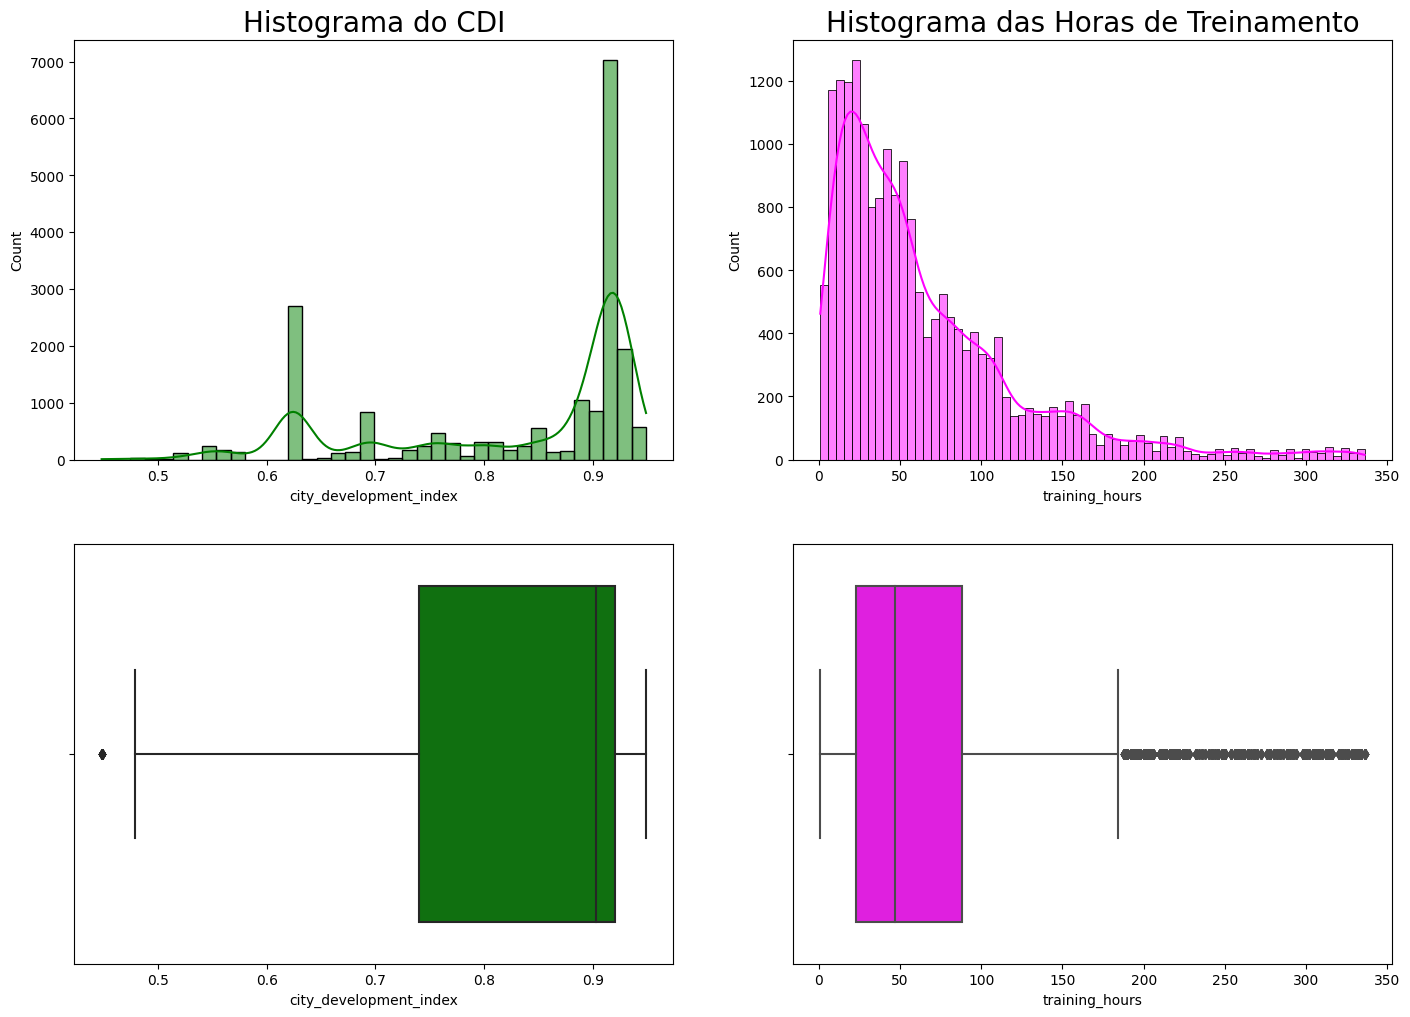

In [294]:
# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color = "green")
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color = "green")

plt.subplot(224)
sns.boxplot(df['training_hours'], color = "magenta")

plt.show()

#Histograma pega o resumo estatístico e coloca em um gráfico - nesse caso nenhuma das variáveis segue a distribuição normal 
#Nos gráficos de Box Plot - os dois são opostos, cada um mais próximo a uma extremidade e ao passo que um tem a medina mais para cima e a maioria dos valores está abaixo da mediana (o outro, rosa, é ao contrário)
#Vemos pelo gráfico de Box Plot que temos outliers - geralmente devemso retirar 
#Geralmente podemos usar esses dois gráficos em conjunto para anlisar se tem alguma anomalia, para ver se é uma distribuição normal ou/e outiliers 

Em Estatística, a distribuição normal é uma das distribuições de probabilidade mais utilizadas para modelar fenômenos naturais. Isso se deve ao fato de que um grande número de fenômenos naturais apresenta sua distribuição de probabilidade tão proximamente normal, que a ela pode ser com sucesso referida, e, portanto, com adequado acerto por ela representada como se normal fosse.

A distribuição normal, também conhecida como distribuição gaussiana, é uma curva simétrica em torno do seu ponto médio, apresentando assim seu famoso formato de sino.

Uma distribuição estatística é uma função que define uma curva, e a área sob essa curva determina a probabilidade de ocorrer o evento por ela correlacionado.

E o que é distribuição normal? É a mais importante dentre as distribuições estatísticas.

A curva de distribuição normal representa o comportamento de diversos processos nas empresas e muitos fenômenos comuns, como por exemplo, altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova.

A distribuição normal pode ser usada para aproximar distribuições discretas de probabilidade, como por exemplo a distribuição binomial. Além disso, a distribuição normal serve também como base para a inferência estatística clássica.

Nela, a média, mediana e moda dos dados possuem o mesmo valor.

In [295]:
![title](projeto2/boxplot.jpg)

zsh:1: unknown sort specifier


In [296]:
# Teste de Normalidade da Distribuição

# Lista com as variáveis numéricas
numerical_feature = ['city_development_index', 'training_hours']

# Loop
for i in numerical_feature:
    
    # Calcula a normalidade
    stats, pval = normaltest(df[i])
    
     # Checar valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


* As variáveis **city_development_index** e **training_hours** não seguem a distribuição normal. Para a análise numérica, usaremos o método não paramétrico.


* Dados de **training_hours** estão localizados principalmente no lado esquerdo do histograma. É um comportamento esperado porque as pessoas geralmente ficam animadas ao fazer o treinamento no início, mas nem todos que começam conseguem terminar uma maratona. ;-)

### Correlação dos Dados

#### Correlação de Spearman Entre Variáveis Numéricas

Analisamos a correlação entre as variáveis numéricas e entre as variáveis numéricas e a variável alvo (o que estamos querendo analisar).

In [297]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [298]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [299]:
# Criamos uma cópia do dataframe original
df_numerical = df.copy()

In [300]:
# Python entendeu como variável categórica por causa dos sinais de > e <. Mas posso usar como variável numérica. 
df_numerical["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [301]:
# Convertemos a variável experience para numérica
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)

In [302]:
df_numerical["experience"].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [303]:
#Aqui o > e o never fizeram com que o Python classificasse com variável categórica também. 
df_numerical["last_new_job"].value_counts()


1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [304]:
# Convertemos a variável last_new_job para numérica
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)

In [305]:
df_numerical["last_new_job"].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [306]:
df_numerical.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [307]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [308]:
#Dropa a coluna com id porque não precisamos da correlação com essa variável
df_numerical.drop("enrollee_id", axis = 1).corr("spearman")

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


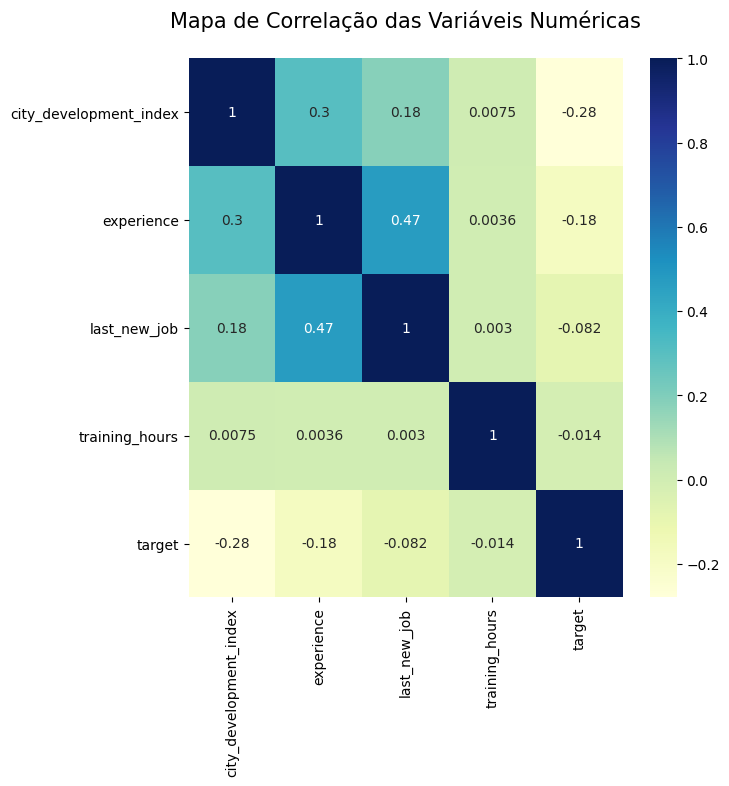

In [309]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

Pela correlação de spearman, last_new_job e experience têm correlação média (0,473), enquanto outros têm correlação fraca.

As variáveis last_new_job e training_hours tem correlação próxima de zero com a variável alvo e poderiam ser descartadas.

Para a relação entre as variáveis categóricas e a variável alvo, usaremos WOE e IV.

### Weight of Evidence (WOE) e Information Value (IV)

Este conjunto de dados contém mais dados com tipo categórico do que tipo numérico. Usaremos recursos categóricos nominais para WOE e IV.

Interpretamos o resultado de IV assim:

    Information Value, Poder de Previsão
    
    < 0.02, não deve ser usado para previsão
    0.02 - 0.1, preditor fraco
    0.1 - 0.3, preditor médio
    0.3 - 0.5, preditor forte
    > 0.5, parece bom demais para ser verdade

In [310]:
# Loop
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')
    
 #Obs.: a variável female tem baixa correlação com 1 e 0 (está procurando e não está procurando emprego), ao contrário de male (tem mais observações).
 #Continuação: mas quando calculamos woe e iv, vemos que nenhuma categoria é relevante para prever o target.    

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

<Figure size 1000x1200 with 0 Axes>

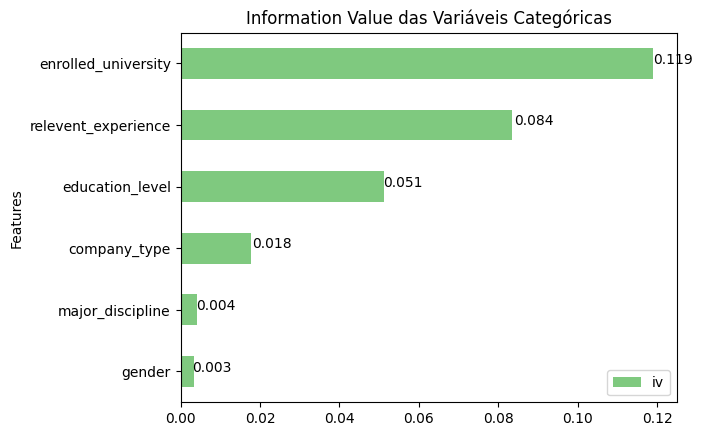

In [311]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

* No gráfico acima, podemos ver a ordem dos recursos com base em seu poder preditivo em relação ao alvo.
* Com base em seu valor IV, `enrolled_university` é um preditor médio, `relevent_experience` e `education_level` são preditores fracos e os outros são inúteis para a previsão.

### Identificando Valores Ausentes

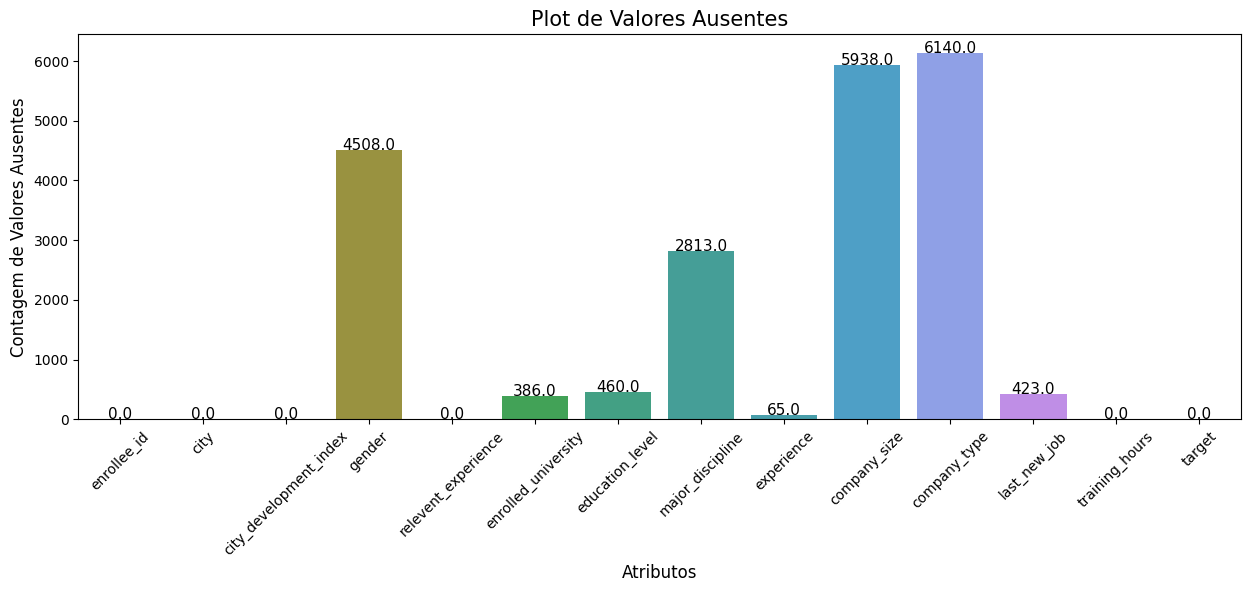

In [312]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()
#Obs.: isna identifica se há ausencia de informação, pode estr preenchido com qualquer outra coisa. 

# Figura
ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

In [313]:
#Fazendo com a ploty 

fig = go.Figure()
    
fig.add_trace(
       go.Bar(
       x= null_df['index'],
                     y=null_df[0], 
                     marker_color=['blue', 'green', 'blue', 'green', 'green', 'blue', 'red', 'yellow', 'brown', 'pink', 'orange', 'purple'], 
                     text=null_df[0].values,
                     textposition='outside'
                     )
              )
fig.update_layout(title = 'Valores ausentes', 
                  template = 'simple_white',
              )

fig.show()


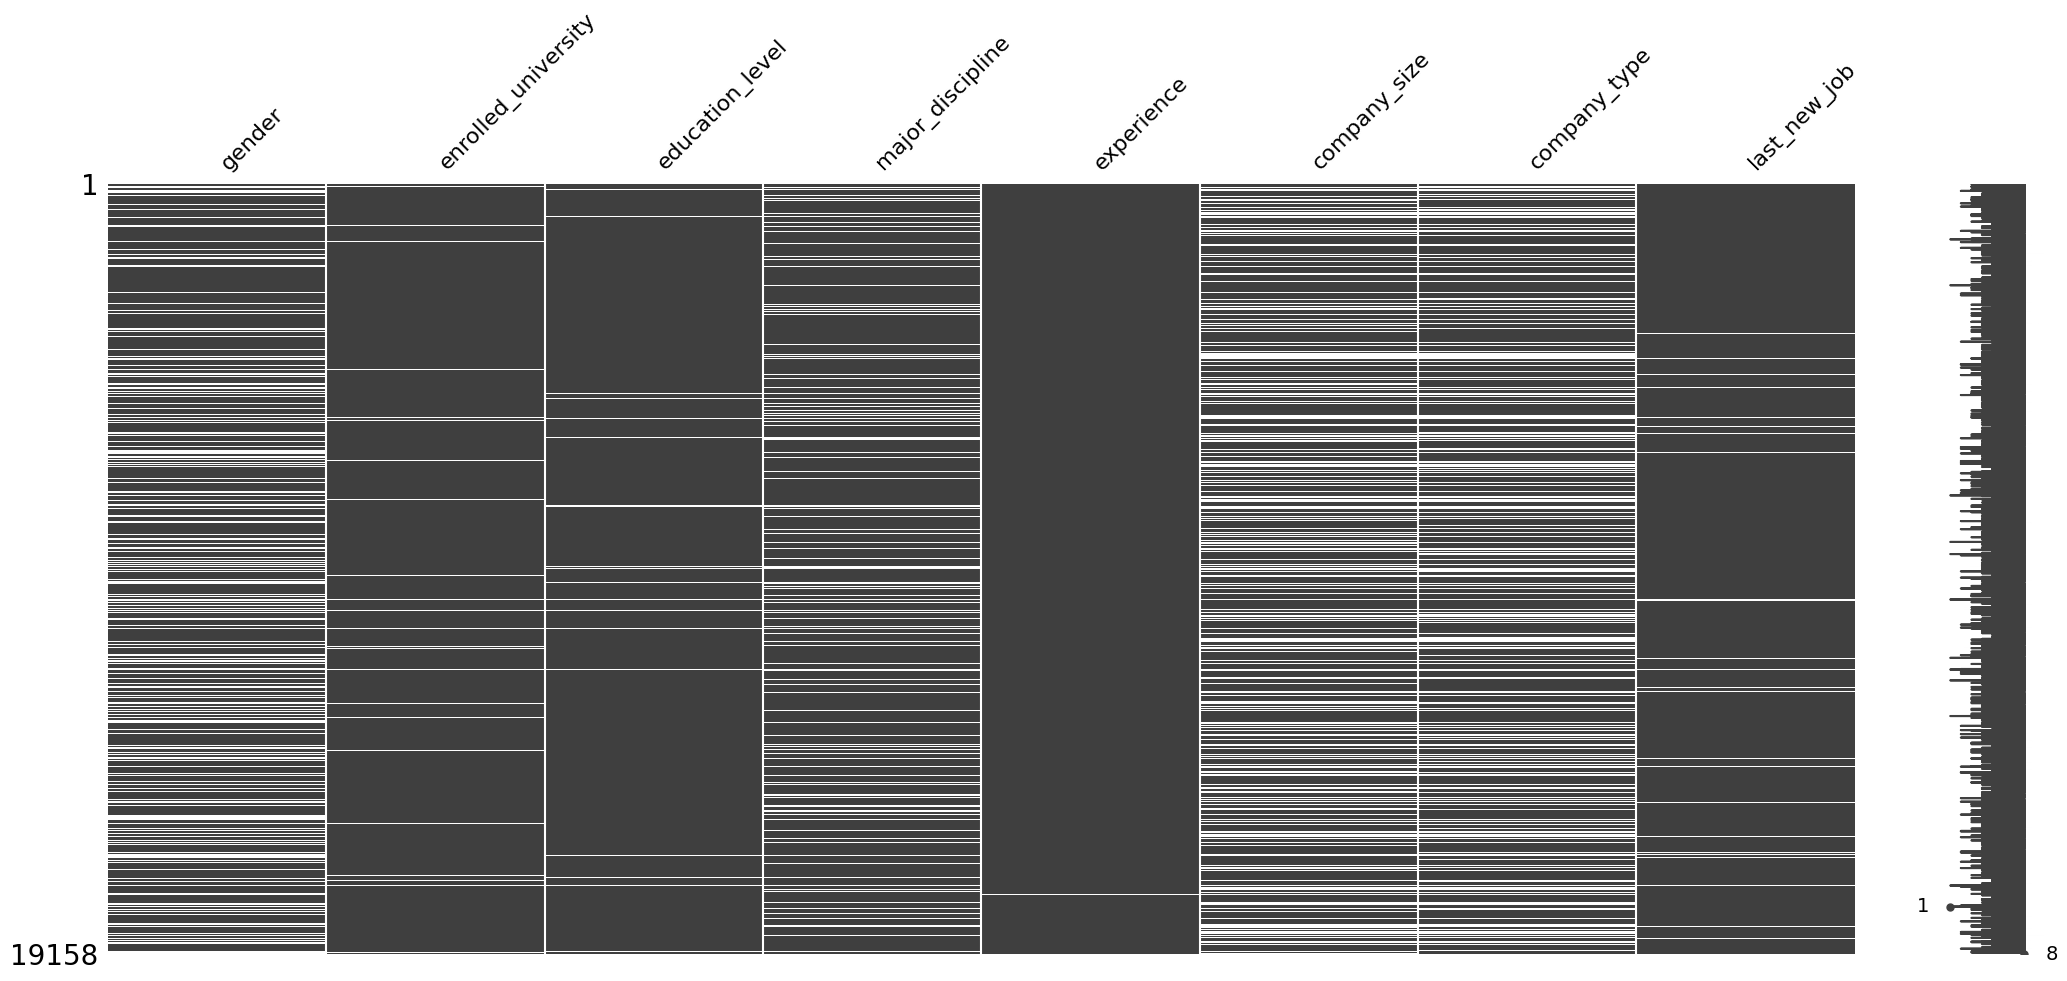

In [314]:
# Gera a visualização
#Para ver se existe um padrão nos valores ausentes

#DataFrame 
df_nan = pd.DataFrame(df.isna().sum())

#Plot mapa de valores ausentes 
if df.isna().any(axis=None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

Valores ausentes em cada coluna têm um padrão aleatório.

### Identificando Valores Duplicados

In [315]:
# Checando valores duplicados (não há)
df['enrollee_id'].duplicated().sum()

0

### Identificando Dados Desbalanceados

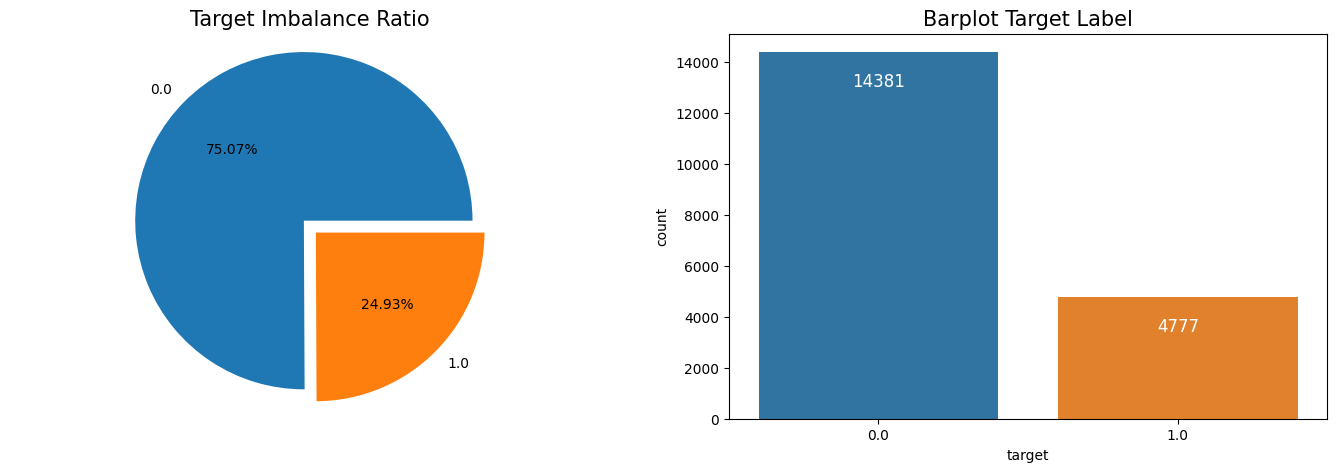

In [316]:
# Figura
plt.figure(figsize = (17,(100)/20))

plt.subplot(121)

plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels = list(df['target'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'target')
plt.title("Barplot Target Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 12)

In [317]:
tupla= (df['target'].value_counts() / len(df) * 100, 2)
tupla

(0.0    75.065247
 1.0    24.934753
 Name: target, dtype: float64,
 2)

In [318]:
explode_values = [0.1, 0, 0, 0.1]

fig = go.Figure()

fig.add_trace(go.Pie(labels = list(df['target'].value_counts().index), 
                     marker_colors = ['blue', 'red'],
                     values = tupla[0],  
                     pull=explode_values, 
                
))
fig.update_layout(title_text='Target Imbalance Ratio',  title_x = 0.5)

In [319]:
fig = go.Figure()
fig.add_trace(go.Bar(
       x = df['target'],
       y = df.groupby('target').size(),  marker_color = ['blue', 'red'],
       text = df.groupby('target').size(),
       textposition='outside',
))
fig.update_layout(title_text='Target Imbalance Ratio',  title_x = 0.5, template = 'simple_white')


fig.show()

In [320]:
# Fazendo com a plotly 
fig = make_subplots(rows=1, cols=2, subplot_titles=['Pie Chart', 'Bar Chart'])

explode_values = [0.1, 0, 0, 0.1]

fig = make_subplots(rows=1, cols=2, subplot_titles=['Pie Chart', 'Bar Chart'], specs=[[{'type': 'domain'}, {'type': 'xy'}]])

fig.add_trace(go.Pie(labels = list(df['target'].value_counts().index), 
                     marker_colors = ['blue', 'red'],
                     values = tupla[0],  
                     pull=explode_values
                     
),row=1, col=1)


fig.add_trace(go.Bar(
       x = df['target'],
       y = df.groupby('target').size(), 
       marker_color = ['blue', 'red'],
       text = df.groupby('target').size(),
       textposition='outside'
       
),row=1, col=2)

fig.update_layout(title_text='Target Imbalance Ratio', title_x=0.5, template='simple_white')

fig.show()
